In [1]:
import pandas as pd
from variables import *
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
import plotly.figure_factory as ff

In [3]:
int_vals = {}
for p in lpopulat:
    int_vals[p] = {}
for pop1, pop2 in itertools.combinations(lpopulat, 2):
    int_data = pd.read_csv("../script_results/intersection/int_HGDP_{}_Neanderthal_HGDP_{}_Neanderthal_0.5.txt".format(pop1,pop2), sep='\t', header=None)
    int_data.columns = ['chr', 'start', 'end', 'ind1', 'ind2']
    art1_data = pd.read_csv("../script_results/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop1), sep='\t', header=None)
    art2_data = pd.read_csv("../script_results/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop2), sep='\t', header=None)
    art1_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
    art2_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
    int_vals[pop1][pop1] = 0
    int_vals[pop1][pop2] = sum(int_data['end']-int_data['start']) #/ sum(art1_data['end']-art1_data['start'])
    int_vals[pop2][pop2] = 0
    int_vals[pop2][pop1] = sum(int_data['end']-int_data['start']) #/ sum(art2_data['end']-art2_data['start'])
    


In [4]:
intersection_ind = {}
for pop in lpopulat:
    art_data = pd.read_csv("../script_results/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(pop), sep='\t', header=None)
    art_data.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
    intersection_ind[pop] = art_data['ind'].nunique()
    #test.append('{}({})'.format(pop,art_data['ind'].nunique()))
    

In [5]:
df = pd.DataFrame(int_vals)
df['pop2'] = df.index
df = df.melt(id_vars="pop2", var_name="pop1", value_name="intersection_length")

In [6]:
art_vals = {}
for p in lpopulat:
    art = pd.read_csv("../script_results/artificialgenomes/art_HGDP_{}_Neanderthal_0.5.txt".format(p), sep='\t', header=None)
    art.columns = ['chr', 'start', 'end', 'mean_prob', 'ind']
    art_vals[p] = sum(art['end']-art['start'])


In [7]:
df["artificial_length"] = [art_vals[i] for i in  df["pop1"]]
df['ratio'] = df['intersection_length'] / df['artificial_length']
cols = ['pop1', 'pop2', 'intersection_length', 'artificial_length', 'ratio']
df = df[cols]

In [8]:
for i in intersection_ind:
    for j in range(len(df)):
        if df['pop1'][j] == i:
            df['pop1'][j] = df['pop1'][j] + ' ({})'.format(intersection_ind[i])
        if df['pop2'][j] == i:
            df['pop2'][j] = df['pop2'][j] + ' ({})'.format(intersection_ind[i]) 
df

,pop1,pop2,intersection_length,artificial_length,ratio
0,Burusho (24),Burusho (24),0,478368000,0.000000
1,Burusho (24),Hazara (19),220038000,478368000,0.459976
2,Burusho (24),Uygur (10),187923000,478368000,0.392842
3,Burusho (24),Bougainville (11),106760000,478368000,0.223175
4,Burusho (24),PapuanHighlands (9),81014000,478368000,0.169355
...,...,...,...,...,...
2204,Mozabite (27),Makrani (25),160253000,300484000,0.533316
2205,Mozabite (27),Kalash (22),123720000,300484000,0.411736
2206,Mozabite (27),Pathan (24),162688000,300484000,0.541420
2207,Mozabite (27),Sindhi (24),160495000,300484000,0.534122


In [9]:
result = df.pivot(index='pop1',columns='pop2',values='ratio')
result

pop2,Adygei (16),Balochi (24),Basque (23),Bedouin (46),BergamoItalian (12),Bougainville (11),Brahui (25),Burusho (24),Cambodian (9),Colombian (7),...,She (10),Sindhi (24),Surui (8),Tu (10),Tujia (9),Tuscan (8),Uygur (10),Xibo (9),Yakut (25),Yi (10)
pop1,,,,,,,,,,,,,,,,,,,,,
Adygei (16),0.000000,0.533369,0.483368,0.556289,0.441501,0.212311,0.538757,0.553559,0.274822,0.181898,...,0.245622,0.552562,0.156042,0.303968,0.250338,0.370067,0.427212,0.291124,0.429839,0.269786
Balochi (24),0.428411,0.000000,0.425069,0.488780,0.371603,0.201542,0.547887,0.538477,0.268043,0.157093,...,0.227153,0.565861,0.134744,0.282591,0.238896,0.309174,0.381477,0.266349,0.384615,0.253178
Basque (23),0.503740,0.551511,0.000000,0.581136,0.493178,0.191958,0.544853,0.530531,0.245265,0.162202,...,0.214476,0.542620,0.135034,0.266998,0.214140,0.401495,0.405129,0.263093,0.390524,0.229492
Bedouin (46),0.471159,0.515403,0.472298,0.000000,0.424996,0.182147,0.528134,0.503597,0.230773,0.144929,...,0.201781,0.515180,0.123479,0.252653,0.206376,0.347268,0.366809,0.240453,0.357650,0.226512
BergamoItalian (12),0.534146,0.559725,0.572537,0.607081,0.000000,0.192880,0.563659,0.550827,0.248083,0.168070,...,0.211160,0.569890,0.145127,0.268427,0.211248,0.424099,0.428809,0.262751,0.395169,0.230613
Bougainville (11),0.292464,0.345647,0.253734,0.296249,0.219613,0.000000,0.348463,0.411881,0.368070,0.182310,...,0.349096,0.378903,0.147719,0.350971,0.366168,0.181608,0.360384,0.346538,0.405870,0.363860
Brahui (25),0.442258,0.559938,0.429174,0.511870,0.382446,0.207653,0.000000,0.538194,0.265632,0.158978,...,0.231043,0.561209,0.139436,0.278206,0.240058,0.317110,0.385177,0.263083,0.390426,0.251652
Burusho (24),0.413180,0.500391,0.379977,0.443805,0.339830,0.223175,0.489364,0.000000,0.291757,0.173318,...,0.255872,0.525219,0.149849,0.311570,0.268513,0.276264,0.392842,0.298559,0.408650,0.293563
Cambodian (9),0.335733,0.407675,0.287508,0.332859,0.250502,0.326416,0.395313,0.477516,0.000000,0.234466,...,0.435310,0.437082,0.205753,0.447959,0.449515,0.207714,0.428340,0.432292,0.503468,0.475111


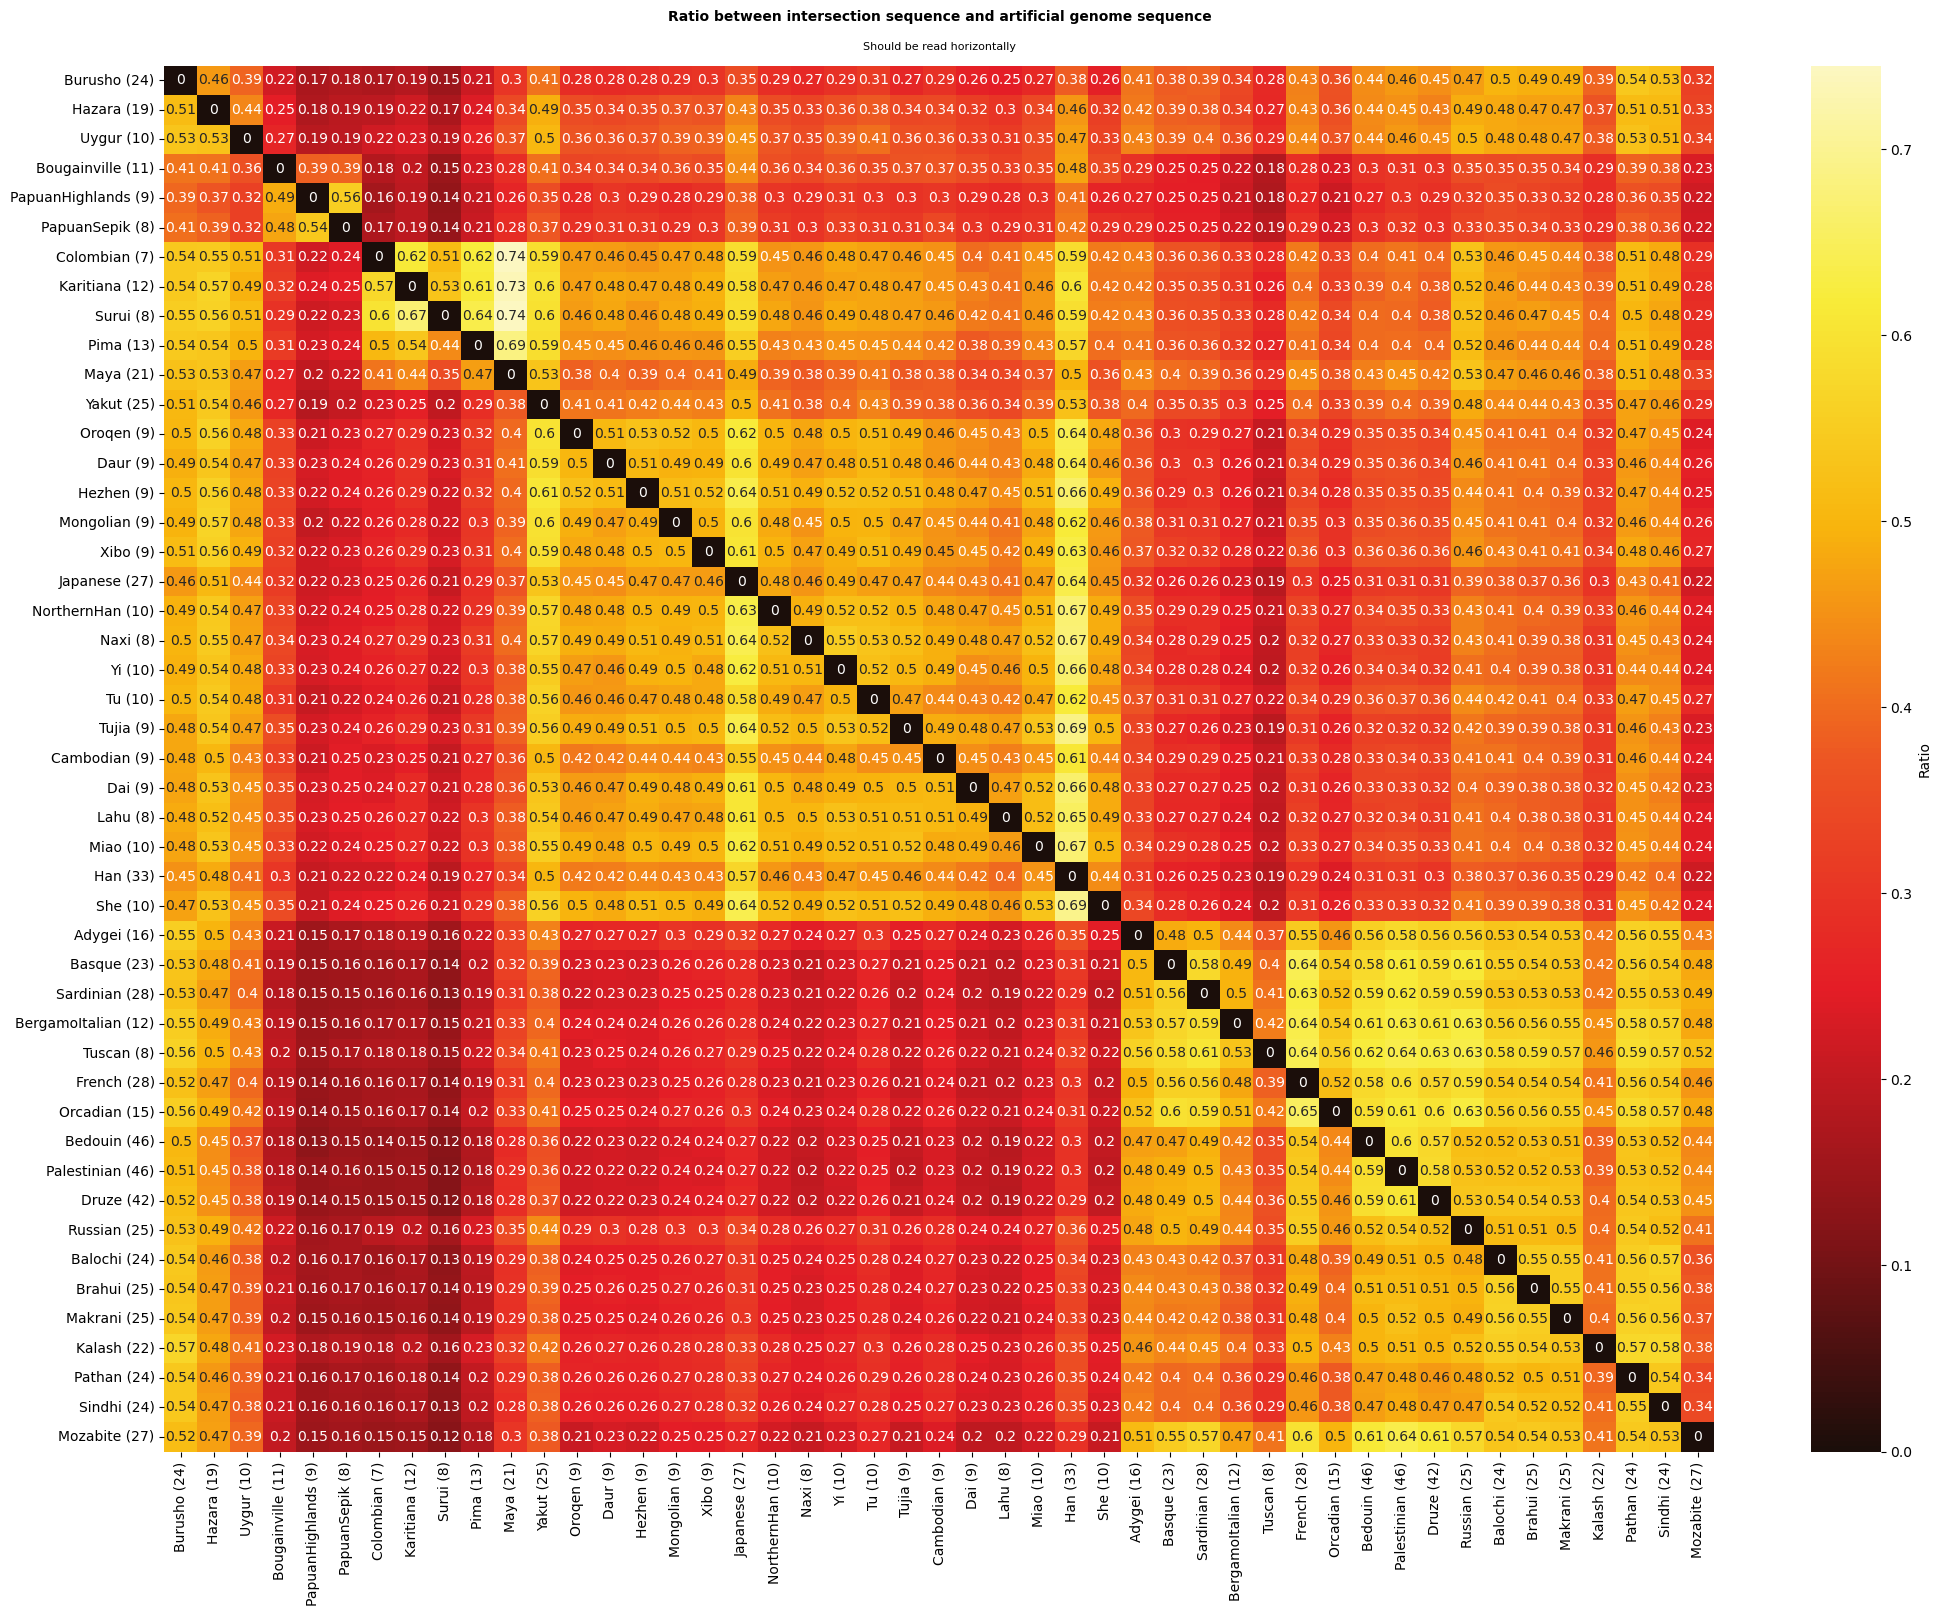

In [16]:
column_order = ['Burusho (24)','Hazara (19)','Uygur (10)','Bougainville (11)','PapuanHighlands (9)','PapuanSepik (8)','Colombian (7)','Karitiana (12)','Surui (8)','Pima (13)', 'Maya (21)','Yakut (25)','Oroqen (9)','Daur (9)','Hezhen (9)','Mongolian (9)','Xibo (9)','Japanese (27)','NorthernHan (10)','Naxi (8)','Yi (10)','Tu (10)','Tujia (9)','Cambodian (9)','Dai (9)','Lahu (8)','Miao (10)','Han (33)','She (10)','Adygei (16)','Basque (23)','Sardinian (28)','BergamoItalian (12)','Tuscan (8)','French (28)','Orcadian (15)','Bedouin (46)','Palestinian (46)','Druze (42)','Russian (25)','Balochi (24)','Brahui (25)','Makrani (25)','Kalash (22)','Pathan (24)','Sindhi (24)','Mozabite (27)']
row_order = ['Burusho (24)','Hazara (19)','Uygur (10)','Bougainville (11)','PapuanHighlands (9)','PapuanSepik (8)','Colombian (7)','Karitiana (12)','Surui (8)','Pima (13)', 'Maya (21)','Yakut (25)','Oroqen (9)','Daur (9)','Hezhen (9)','Mongolian (9)','Xibo (9)','Japanese (27)','NorthernHan (10)','Naxi (8)','Yi (10)','Tu (10)','Tujia (9)','Cambodian (9)','Dai (9)','Lahu (8)','Miao (10)','Han (33)','She (10)','Adygei (16)','Basque (23)','Sardinian (28)','BergamoItalian (12)','Tuscan (8)','French (28)','Orcadian (15)','Bedouin (46)','Palestinian (46)','Druze (42)','Russian (25)','Balochi (24)','Brahui (25)','Makrani (25)','Kalash (22)','Pathan (24)','Sindhi (24)','Mozabite (27)']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(25, 18))
heat_map = sns.heatmap(table4,linewidth = 0, annot=True,xticklabels=True,yticklabels=True, cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True), cbar_kws={'label': 'Ratio'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Ratio between intersection sequence and artificial genome sequence', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Should be read horizontally', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)

plt.savefig('../script_results/plots/neanderthal_ratio_intersection_artificialgenome.png')

In [19]:
dfi.export(
    result,
    "../script_results/tables/denisova_ratio_intersection_artificialgenome.png",
    table_conversion="matplotlib",
    max_cols = -1
)